<a href="https://colab.research.google.com/github/home0712/GEOG376/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In [ ]:
!pip install plotly-express
!pip install pysal
!pip install geopandas
!pip install splot --quiet
!pip install -U mgwr --quiet

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import plotly.express as px
import esda
import numpy as np
import libpysal as ps
import statsmodels.api as sm
from mgwr.gwr import GWR, MGWR
from mgwr.sel_bw import Sel_BW
from mgwr.utils import shift_colormap, truncate_colormap
from scipy import stats
from shapely.geometry import shape, GeometryCollection
from shapely.geometry.polygon import Polygon

/usr/local/lib/python3.10/dist-packages/geopandas/_compat.py:123: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
<ipython-input-6-e986afe7d5fd>:2: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migration_pygeos.html).
  imp

# Load Data

In [ ]:
# Load the EV sales and population dataset
ev_data = pd.read_csv('https://raw.githubusercontent.com/MinJi-Kim710/geog376/main/ev_sales_population_data.csv')
geodatatest = gpd.read_file('/content/drive/MyDrive/2023 Spring/GEOG376/Project/States_shapefile.shp')
gpd_ev_data = gpd.GeoDataFrame(ev_data, geometry=geodatatest["geometry"])

In [ ]:
gpd_ev_data.head()

,States,all_ev_registration,population,law_and_incentive,median_household_income,environment_score,infrastructure_port,fips,ID,geometry
0,Alabama,4750,5056005,12,53913,36.11,480,1,AL,"POLYGON ((-85.07007 31.98070, -85.11515 31.907..."
1,Alaska,1290,731721,8,77845,40.91,81,2,AK,"MULTIPOLYGON (((-161.33379 58.73325, -161.3824..."
2,Arizona,40740,7408017,30,69056,49.54,1952,4,AZ,"POLYGON ((-114.52063 33.02771, -114.55909 33.0..."
3,Arkansas,2390,3042231,9,52528,48.89,412,5,AR,"POLYGON ((-94.46169 34.19677, -94.45262 34.508..."
4,California,563070,38959247,145,84907,75.46,34185,6,CA,"MULTIPOLYGON (((-121.66522 38.16929, -121.7823..."


# EV Adoption Rate By States

In [ ]:
from urllib.request import urlopen
import json
with urlopen('https://raw.githubusercontent.com/MinJi-Kim710/Minji-Kim710.github.io/main/us-states.json') as response:
    states = json.load(response)

# Load the EV sales and population dataset
ev_data = pd.read_csv('https://raw.githubusercontent.com/MinJi-Kim710/geog376/main/ev_sales_population_data.csv', dtype={"fips": str})

# Calculate the EV adoption rate by state
ev_data['ev_adoption_rate'] = ev_data['all_ev_registration'].astype(int) / ev_data['population'].astype(int) * 100

# Create a choropleth map of EV adoption rates by state
fig = px.choropleth(ev_data,
                    locations='ID',
                    geojson=states,
                    locationmode='USA-states',
                    color_continuous_scale="YlGn",
                    scope='usa',
                    color='ev_adoption_rate',
                    title='EV Adoption Rates by State')
fig.show()

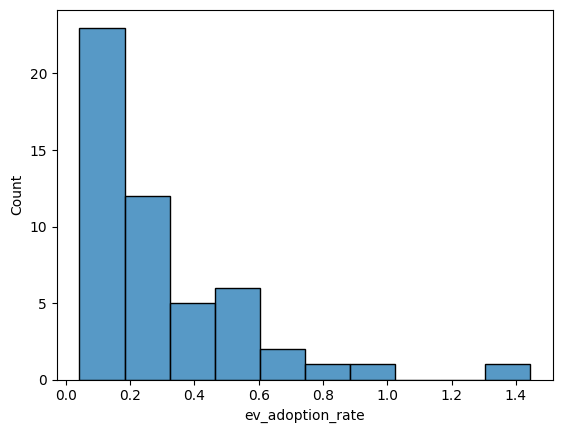

In [ ]:
sns.histplot(data=ev_data, x='ev_adoption_rate')
plt.show()

# OLS Analysis

## original data

       States  all_ev_registration  population  law_and_incentive  \
0     Alabama                 4750     5056005                 12   
1      Alaska                 1290      731721                  8   
2     Arizona                40740     7408017                 30   
3    Arkansas                 2390     3042231                  9   
4  California               563070    38959247                145   

   median_household_income  environment_score  infrastructure_port fips  ID  \
0                    53913              36.11                  480   01  AL   
1                    77845              40.91                   81   02  AK   
2                    69056              49.54                 1952   04  AZ   
3                    52528              48.89                  412   05  AR   
4                    84907              75.46                34185   06  CA   

   ev_adoption_rate  
0          0.093948  
1          0.176297  
2          0.549945  
3          0.078561  


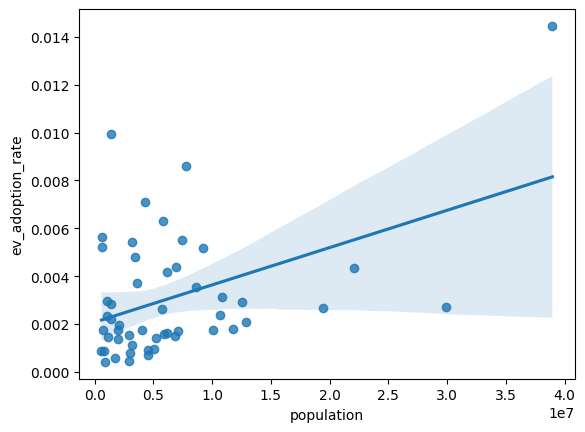

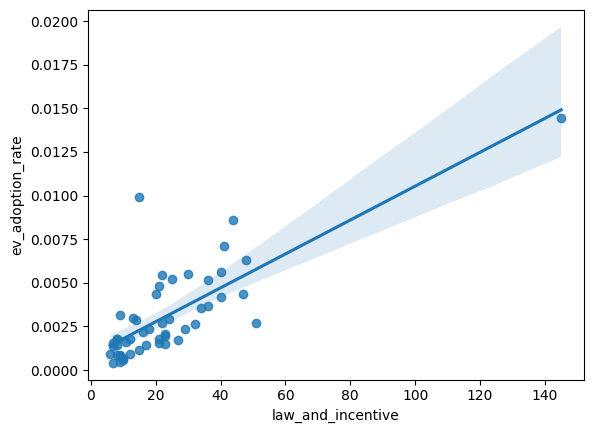

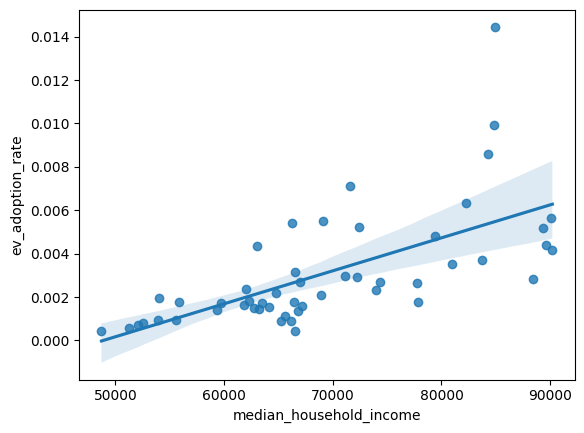

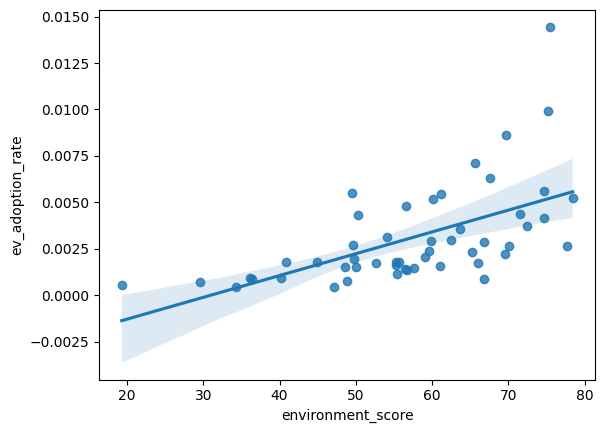

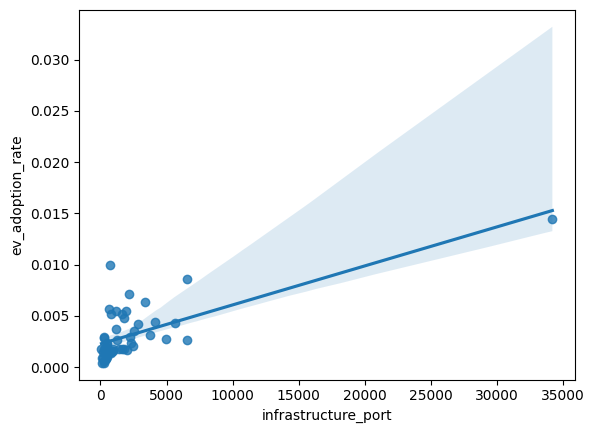

In [ ]:
# Perform basic EDA
print(ev_data.head())
print(ev_data.info())
print(ev_data.describe())

# Calculate the EV adoption rate by state
ev_data['ev_adoption_rate'] = ev_data['all_ev_registration'] / ev_data['population']

# Analyze the relationship between EV adoption rates and government incentives
sns.regplot(data=ev_data, x='population', y='ev_adoption_rate')
plt.show()

# Analyze the relationship between EV adoption rates and charging infrastructure
sns.regplot(data=ev_data, x='law_and_incentive', y='ev_adoption_rate')
plt.show()

# Analyze the relationship between EV adoption rates and income levels
sns.regplot(data=ev_data, x='median_household_income', y='ev_adoption_rate')
plt.show()

# Analyze the relationship between EV adoption rates and environmental awareness
sns.regplot(data=ev_data, x='environment_score', y='ev_adoption_rate')
plt.show()

# Analyze the relationship between EV adoption rates and environmental awareness
sns.regplot(data=ev_data, x='infrastructure_port', y='ev_adoption_rate')
plt.show()

## Data without California

In [ ]:
ev_data_except_cali = ev_data[ev_data['States'] != "California"]
ev_data_except_cali.head()

,States,all_ev_registration,population,law_and_incentive,median_household_income,environment_score,infrastructure_port,fips,ID,ev_adoption_rate
0,Alabama,4750,5056005,12,53913,36.11,480,01,AL,0.000939
1,Alaska,1290,731721,8,77845,40.91,81,02,AK,0.001763
2,Arizona,40740,7408017,30,69056,49.54,1952,04,AZ,0.005499
3,Arkansas,2390,3042231,9,52528,48.89,412,05,AR,0.000786
5,Colorado,37000,5855078,48,82254,67.58,3355,08,CO,0.006319


     States  all_ev_registration  population  law_and_incentive  \
0   Alabama                 4750     5056005                 12   
1    Alaska                 1290      731721                  8   
2   Arizona                40740     7408017                 30   
3  Arkansas                 2390     3042231                  9   
5  Colorado                37000     5855078                 48   

   median_household_income  environment_score  infrastructure_port fips  ID  \
0                    53913              36.11                  480   01  AL   
1                    77845              40.91                   81   02  AK   
2                    69056              49.54                 1952   04  AZ   
3                    52528              48.89                  412   05  AR   
5                    82254              67.58                 3355   08  CO   

   ev_adoption_rate  
0          0.000939  
1          0.001763  
2          0.005499  
3          0.000786  
5          0

<ipython-input-39-d9439e6dd393>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



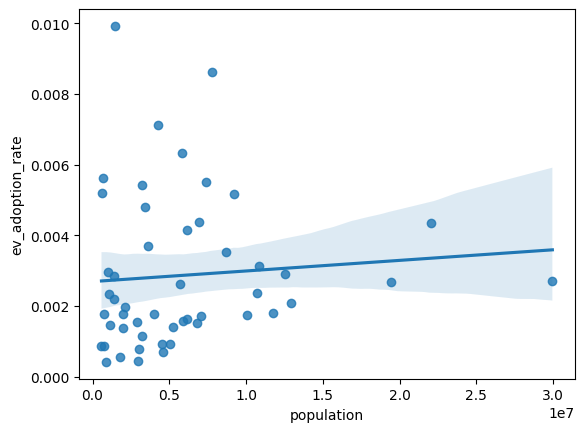

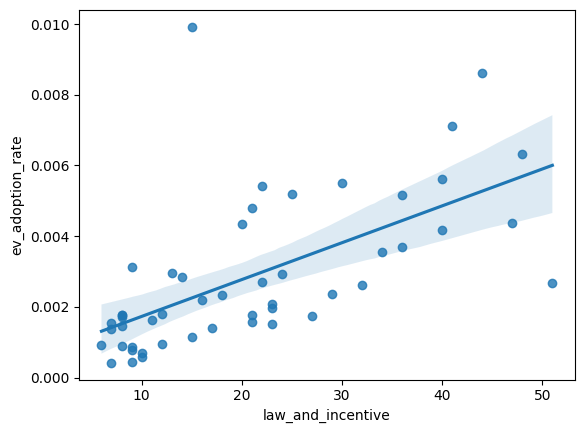

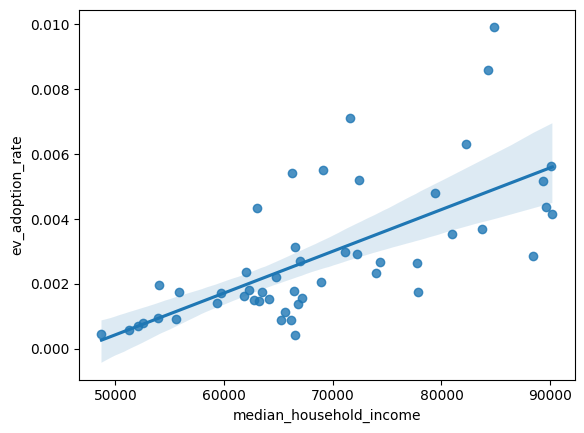

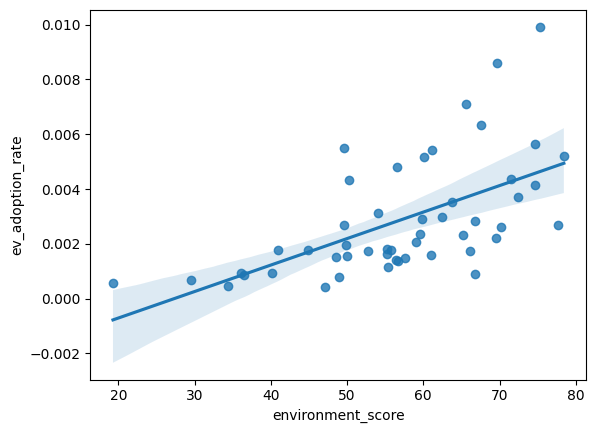

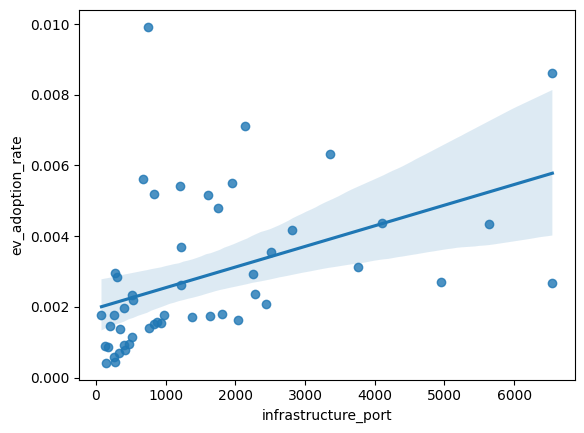

In [ ]:
# Perform basic EDA
print(ev_data_except_cali.head())
print(ev_data_except_cali.info())
print(ev_data_except_cali.describe())

# Calculate the EV adoption rate by state
ev_data_except_cali['ev_adoption_rate'] = ev_data_except_cali['all_ev_registration'] / ev_data_except_cali['population']

# Analyze the relationship between EV adoption rates and government incentives
sns.regplot(data=ev_data_except_cali, x='population', y='ev_adoption_rate')
plt.show()

# Analyze the relationship between EV adoption rates and charging infrastructure
sns.regplot(data=ev_data_except_cali, x='law_and_incentive', y='ev_adoption_rate')
plt.show()

# Analyze the relationship between EV adoption rates and income levels
sns.regplot(data=ev_data_except_cali, x='median_household_income', y='ev_adoption_rate')
plt.show()

# Analyze the relationship between EV adoption rates and environmental awareness
sns.regplot(data=ev_data_except_cali, x='environment_score', y='ev_adoption_rate')
plt.show()

# Analyze the relationship between EV adoption rates and environmental awareness
sns.regplot(data=ev_data_except_cali, x='infrastructure_port', y='ev_adoption_rate')
plt.show()

## Pearson's Correlation Coefficient

In [ ]:
# Calculate the Pearson correlation coefficients between EV adoption rate and each factor
pop_corr, pop_pvalue = stats.pearsonr(ev_data['population'], ev_data['ev_adoption_rate'])
law_corr, law_pvalue = stats.pearsonr(ev_data['law_and_incentive'], ev_data['ev_adoption_rate'])
income_corr, income_pvalue = stats.pearsonr(ev_data['median_household_income'], ev_data['ev_adoption_rate'])
environment_corr, environment_pvalue = stats.pearsonr(ev_data['environment_score'], ev_data['ev_adoption_rate'])
charging_corr, charging_pvalue = stats.pearsonr(ev_data['infrastructure_port'], ev_data['ev_adoption_rate'])


# Print the correlation coefficients and p-values
print("Population correlation: {:.3f} (p={:.3f})".format(pop_corr, pop_pvalue))
print("Law and incentive correlation: {:.3f} (p={:.3f})".format(law_corr, law_pvalue))
print("Median income correlation: {:.3f} (p={:.3f})".format(income_corr, income_pvalue))
print("Environmental score correlation: {:.3f} (p={:.3f})".format(environment_corr, environment_pvalue))
print("Charging infrastructure correlation: {:.3f} (p={:.3f})".format(charging_corr, charging_pvalue))

Population correlation: 0.432 (p=0.002)
Law and incentive correlation: 0.782 (p=0.000)
Median income correlation: 0.645 (p=0.000)
Environmental score correlation: 0.576 (p=0.000)
Charging infrastructure correlation: 0.693 (p=0.000)


# GWR Analysis

## import data

<ipython-input-15-40c5500b7011>:3: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.




<Axes: >

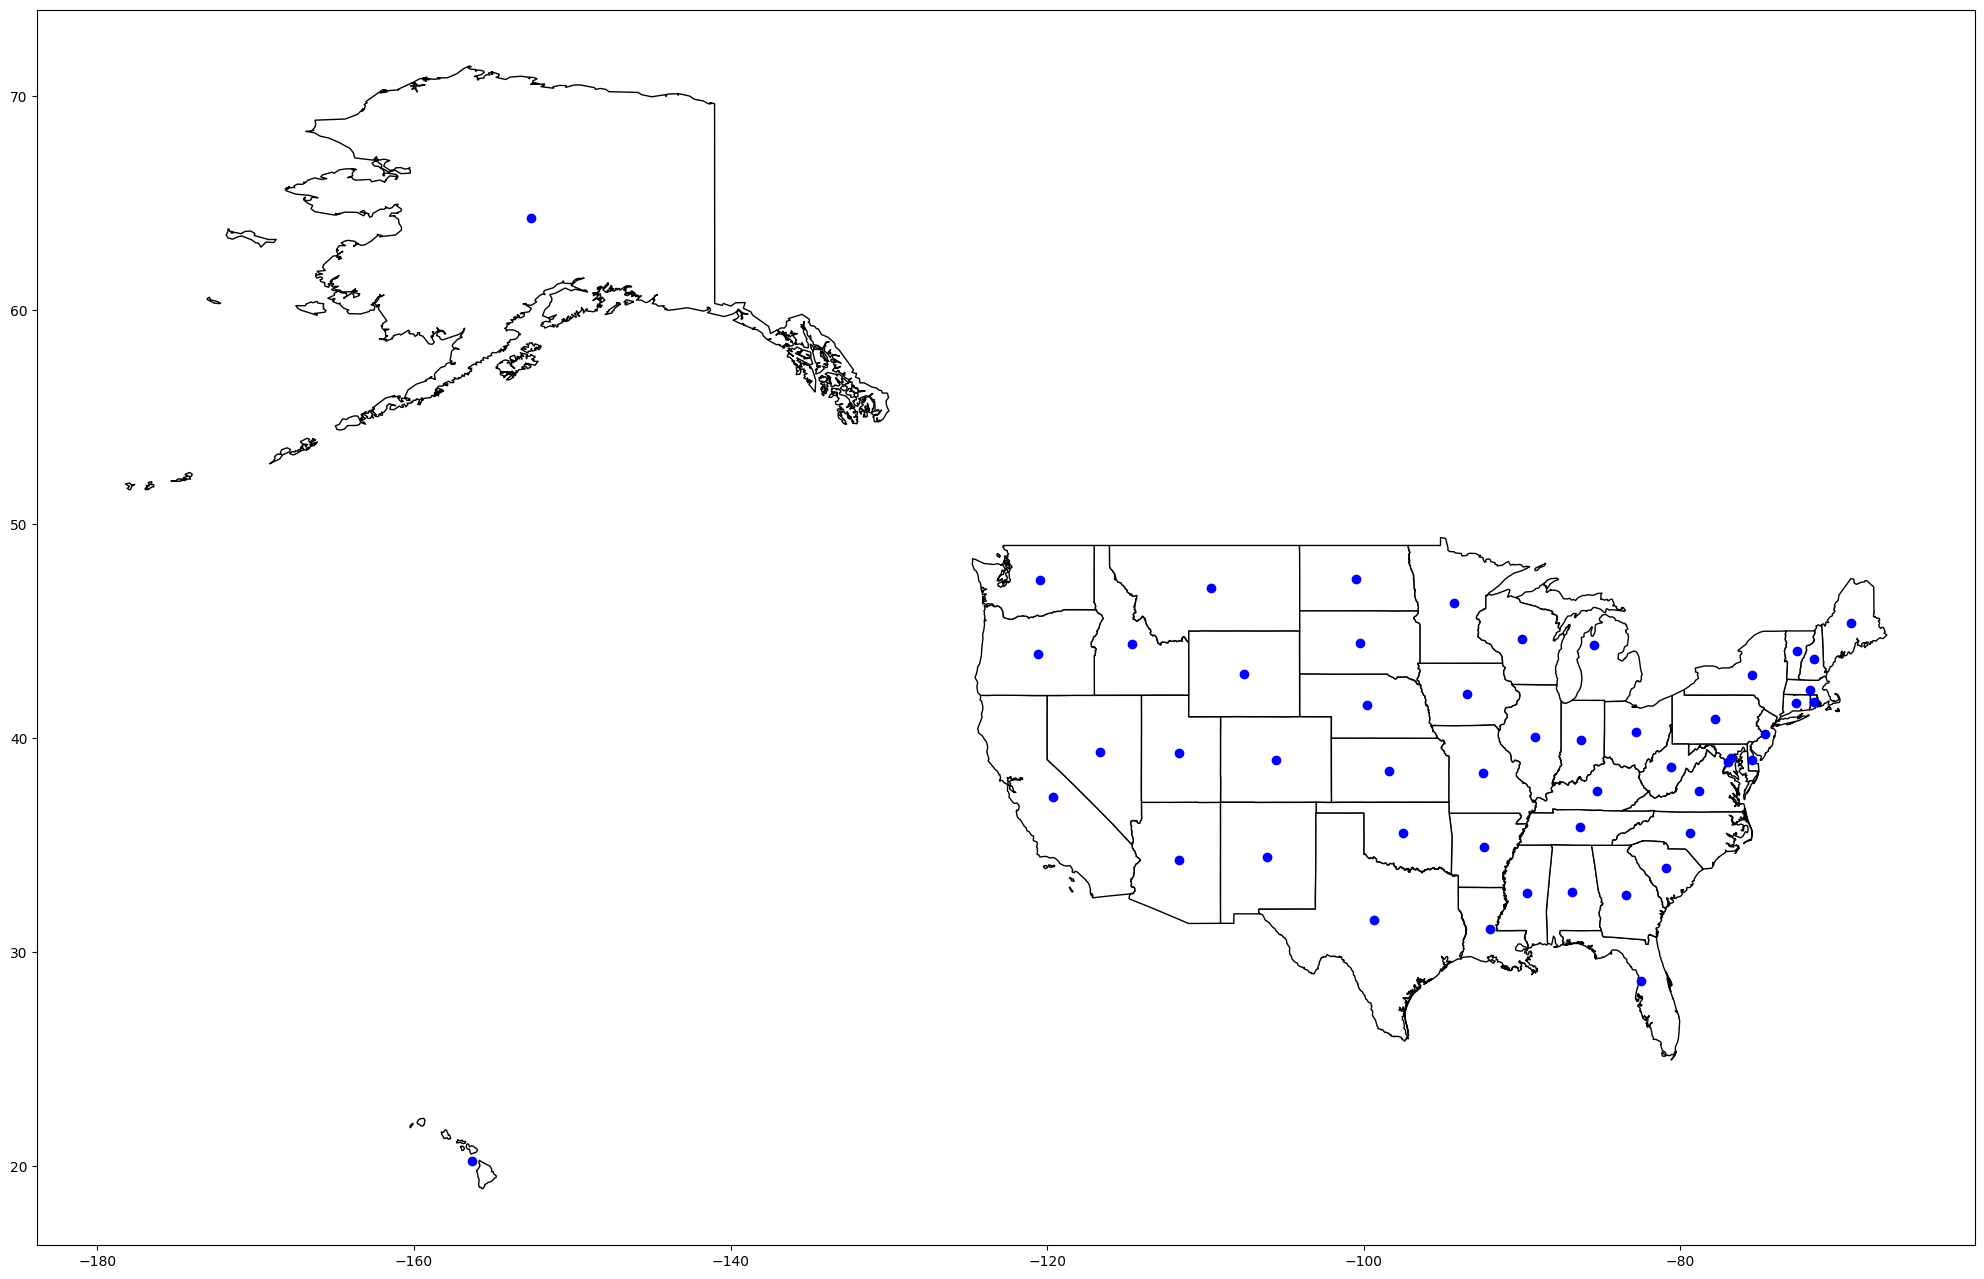

In [ ]:
fix, ax = plt.subplots(figsize=(25, 25))
gpd_ev_data.plot(ax=ax, **{"edgecolor": "black", "facecolor": "white"})
gpd_ev_data.centroid.plot(ax=ax, c="blue")

## Prepare Variables

In [ ]:
gpd_ev_data['g_y'] = (gpd_ev_data['all_ev_registration'] / gpd_ev_data['all_ev_registration'].sum(axis=0)) * 100
g_y = gpd_ev_data['all_ev_registration'].values.reshape((-1,1))
g_y.shape

In [ ]:
g_y[:]

In [ ]:
gpd_ev_data['PCT_population'] = (gpd_ev_data['population'] / gpd_ev_data['population'].sum(axis=0)) * 100
gpd_ev_data['PCT_law_and_incentive'] = (gpd_ev_data['law_and_incentive'] / gpd_ev_data['law_and_incentive'].sum(axis=0)) * 100
gpd_ev_data['PCT_median_household_income'] = (gpd_ev_data['median_household_income'] / gpd_ev_data['median_household_income'].sum(axis=0)) * 100
gpd_ev_data['PCT_environment_score'] = (gpd_ev_data['environment_score'] / gpd_ev_data['environment_score'].sum(axis=0)) * 100
gpd_ev_data['PCT_infrastructure_port'] = (gpd_ev_data['infrastructure_port'] / gpd_ev_data['infrastructure_port'].sum(axis=0)) * 100

g_X = gpd_ev_data[['PCT_population', 'PCT_law_and_incentive', 'PCT_median_household_income', 'PCT_environment_score', 'PCT_infrastructure_port']].values
g_X.shape

In [ ]:
g_X

In [ ]:
gpd_ev_data["x"] = gpd_ev_data.centroid.map(lambda p: p.x)
gpd_ev_data["y"] = gpd_ev_data.centroid.map(lambda p: p.y)
u = gpd_ev_data["x"]
v = gpd_ev_data["y"]
g_coords = list(zip(u,v))
g_coords[0:5]

<ipython-input-20-16f95e9c8d9b>:1: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


<ipython-input-20-16f95e9c8d9b>:2: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.




[(-86.8263454530828, 32.794823340236945),
 (-152.57130814157662, 64.317171794731),
 (-111.66459194651326, 34.29168341869282),
 (-92.43380148731089, 34.89795307658614),
 (-119.60114708073095, 37.241741103787106)]

## Estimate GWR model

### Select GWR bandwidth

In [ ]:
# Select bandwidth for kernel
gwr_selector = Sel_BW(g_coords, g_y, g_X)
gwr_bw = gwr_selector.search(bw_min=2)
gwr_bw

33.0

### OLS summary

In [ ]:
results = sm.OLS(g_y, g_X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.980
Method:                 Least Squares   F-statistic:                              494.1
Date:                Sun, 30 Apr 2023   Prob (F-statistic):                    9.25e-39
Time:                        18:03:30   Log-Likelihood:                         -548.25
No. Observations:                  51   AIC:                                      1106.
Df Residuals:                      46   BIC:                                      1116.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          -501.5771   1230.411     -0.408      0.685   -2978.267    1975.113
x2         -1010.5249   2413.480     -0.419      0.677   -5868.609    3847.559
x3          8374.5318   5686.026      1.473      0.148   -3070.846    1.98e+04
x4         -1.121e+04   5769.469     -1.943      0.058   -2.28e+04     400.445
x5          1.885e+04   1125.438     16.745      0.000    1.66e+04    2.11e+04
==============================================================================
Omnibus:                       20.772   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.538
Skew:                          -1.314   Prob(JB):                     8.60e-08
Kurtosis:                       5.899   Cond. No.                         29.3
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Fit GWR model

In [ ]:
gwr_results = GWR(g_coords, g_y, g_X, gwr_bw).fit()

In [ ]:
gwr_results.summary()

Model type                                                         Gaussian
Number of observations:                                                  51
Number of covariates:                                                     6

Global Regression Results
---------------------------------------------------------------------------
Residual sum of squares:                                       6465782205.136
Log-likelihood:                                                    -548.144
AIC:                                                               1108.288
AICc:                                                              1112.893
BIC:                                                           6465782028.204
R2:                                                                   0.979
Adj. R2:                                                              0.977

Variable                              Est.         SE  t(Est/SE)    p-value
------------------------------- ---------- ---------- --

## Add coefficients to data frame

In [ ]:
# Add GWR parameters to GeoDataframe
gpd_ev_data['gwr_intercept'] = gwr_results.params[:,0]
gpd_ev_data['gwr_population'] = gwr_results.params[:,1]
gpd_ev_data['gwr_law'] = gwr_results.params[:,2]
gpd_ev_data['gwr_median_income'] = gwr_results.params[:,3]
gpd_ev_data['gwr_env_score'] = gwr_results.params[:,4]
gpd_ev_data['gwr_infra_port'] = gwr_results.params[:,5]

## Filter/correct t-stats

In [ ]:
gwr_filtered_t = gwr_results.filter_tvals()

## Map coefficients

<ipython-input-27-c3c318e08bd9>:36: MatplotlibDeprecationWarning:

Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.



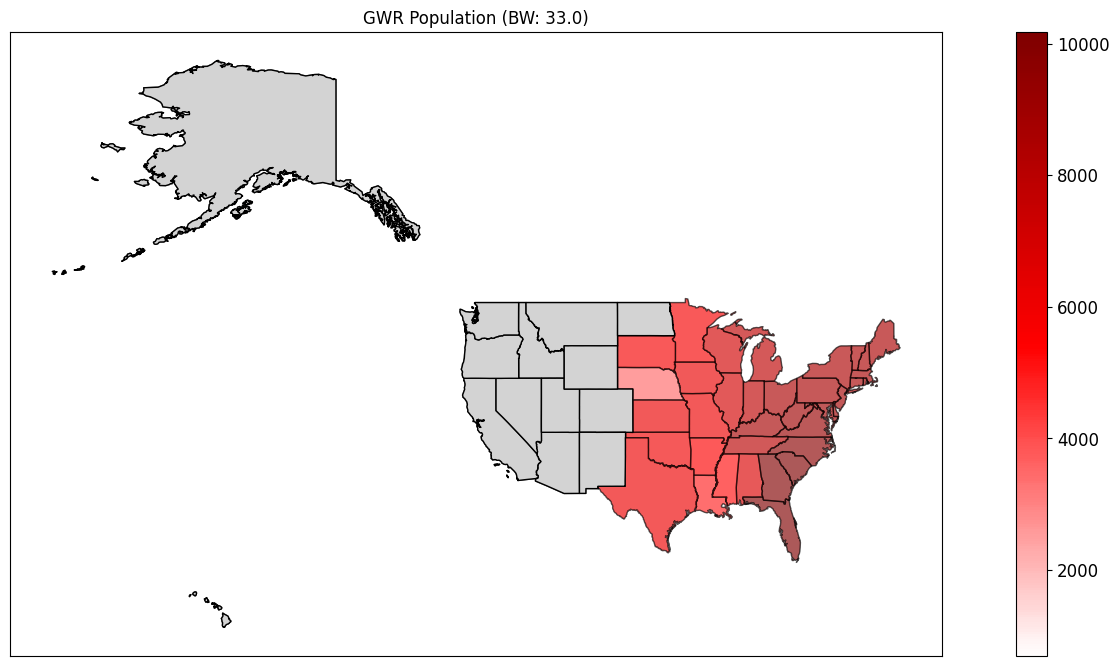

In [ ]:
#Prep plot and add axis
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,7))
ax.set_title('GWR Population (BW: ' + str(gwr_bw) +')', fontsize=12)

#Set color map
cmap = plt.cm.seismic

#Find min and max values of the combined dataset
gwr_min = gpd_ev_data['gwr_population'].min()
gwr_max = gpd_ev_data['gwr_population'].max()
vmin = np.min([gwr_min])
vmax = np.max([gwr_max])

#If all values are negative use the negative half of the colormap
if (vmin < 0) & (vmax < 0):
    cmap = truncate_colormap(cmap, 0.0, 0.5)
#If all values are positive use the positive half of the colormap
elif (vmin > 0) & (vmax > 0):
    cmap = truncate_colormap(cmap, 0.5, 1.0)
#Otherwise, there are positive and negative values so the colormap so zero is the midpoint
else:
    cmap = shift_colormap(cmap, start=0.0, midpoint=1 - vmax/(vmax + abs(vmin)), stop=1.0, name='pop')

#Create scalar mappable for colorbar and stretch colormap across range of data values
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))

#Plot GWR parameters
gpd_ev_data.plot('gwr_population', cmap=sm.cmap, ax=ax, vmin=vmin, vmax=vmax, **{'edgecolor':'black', 'alpha':.65})
#If there are insignificnt parameters plot gray polygons over them
if (gwr_filtered_t[:,1] == 0).any():
    gpd_ev_data[gwr_filtered_t[:,1] == 0].plot(color='lightgrey', ax=ax, **{'edgecolor':'black'})

#Set figure options and plot
fig.tight_layout()
sm._A = []
cbar = fig.colorbar(sm)
cbar.ax.tick_params(labelsize=12)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.show()

<ipython-input-28-96b1f7d8648c>:36: MatplotlibDeprecationWarning:

Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.



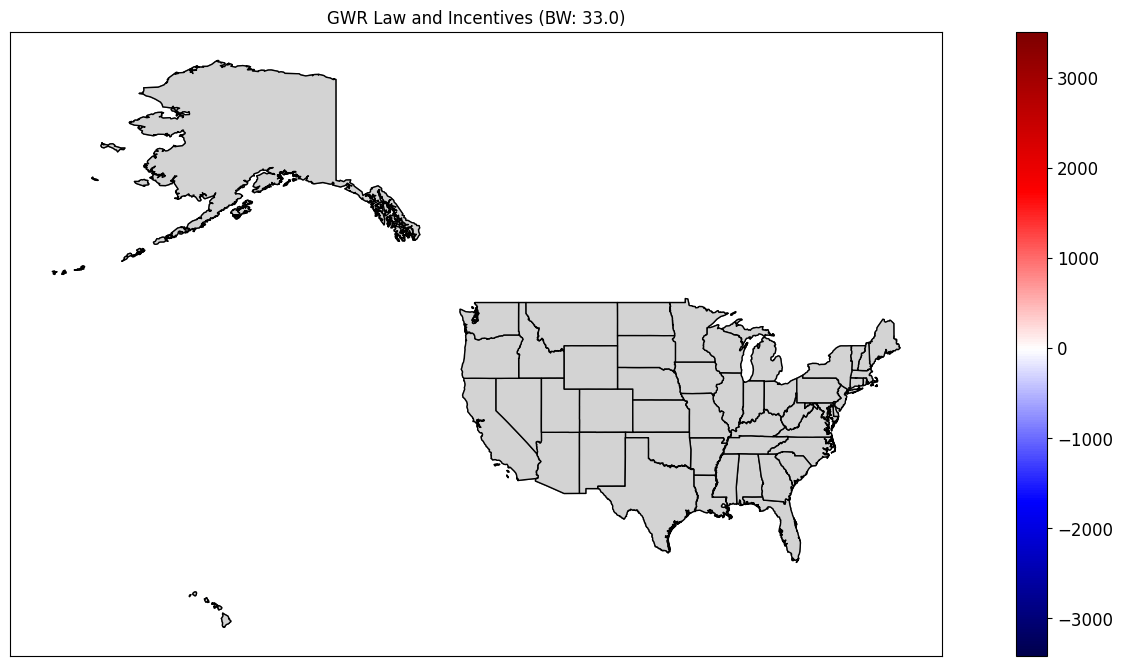

In [ ]:
#Prep plot and add axis
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,7))
ax.set_title('GWR Law and Incentives (BW: ' + str(gwr_bw) +')', fontsize=12)

#Set color map
cmap = plt.cm.seismic

#Find min and max values of the combined dataset
gwr_min = gpd_ev_data['gwr_law'].min()
gwr_max = gpd_ev_data['gwr_law'].max()
vmin = np.min([gwr_min])
vmax = np.max([gwr_max])

#If all values are negative use the negative half of the colormap
if (vmin < 0) & (vmax < 0):
    cmap = truncate_colormap(cmap, 0.0, 0.5)
#If all values are positive use the positive half of the colormap
elif (vmin > 0) & (vmax > 0):
    cmap = truncate_colormap(cmap, 0.5, 1.0)
#Otherwise, there are positive and negative values so the colormap so zero is the midpoint
else:
    cmap = shift_colormap(cmap, start=0.0, midpoint=1 - vmax/(vmax + abs(vmin)), stop=1.0, name='law')

#Create scalar mappable for colorbar and stretch colormap across range of data values
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))

#Plot GWR parameters
gpd_ev_data.plot('gwr_law', cmap=sm.cmap, ax=ax, vmin=vmin, vmax=vmax, **{'edgecolor':'black', 'alpha':.65})
#If there are insignificnt parameters plot gray polygons over them
if (gwr_filtered_t[:,2] == 0).any():
    gpd_ev_data[gwr_filtered_t[:,2] == 0].plot(color='lightgrey', ax=ax, **{'edgecolor':'black'})

#Set figure options and plot
fig.tight_layout()
sm._A = []
cbar = fig.colorbar(sm)
cbar.ax.tick_params(labelsize=12)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.show()

<ipython-input-29-50972602d666>:36: MatplotlibDeprecationWarning:

Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.



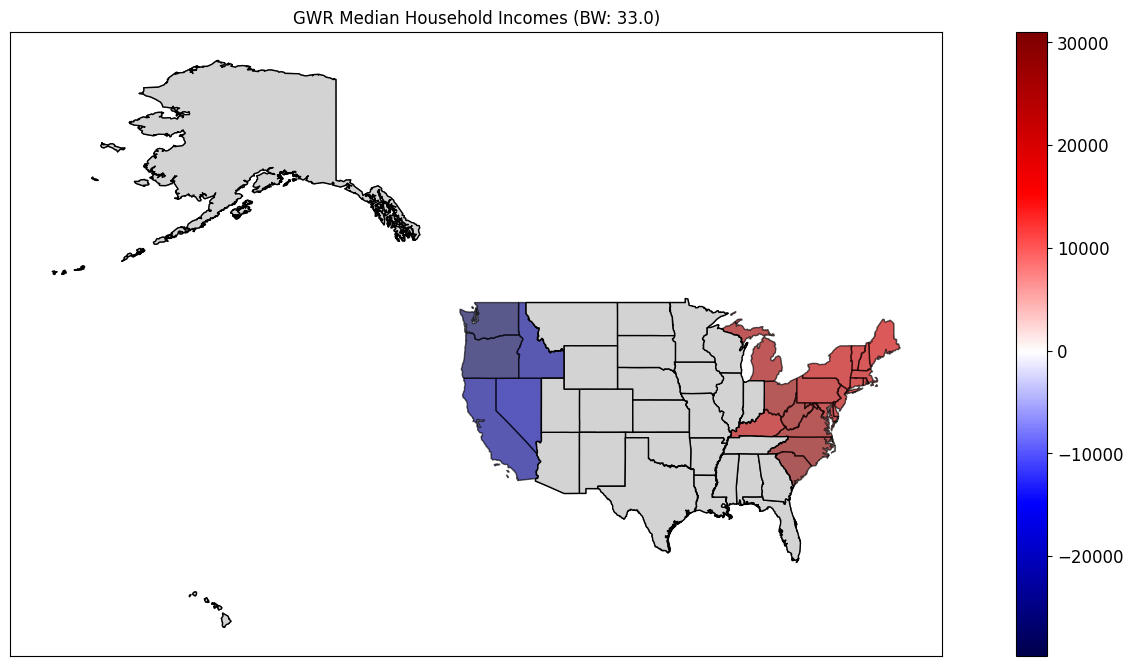

In [ ]:
#Prep plot and add axis
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,7))
ax.set_title('GWR Median Household Incomes (BW: ' + str(gwr_bw) +')', fontsize=12)

#Set color map
cmap = plt.cm.seismic

#Find min and max values of the combined dataset
gwr_min = gpd_ev_data['gwr_median_income'].min()
gwr_max = gpd_ev_data['gwr_median_income'].max()
vmin = np.min([gwr_min])
vmax = np.max([gwr_max])

#If all values are negative use the negative half of the colormap
if (vmin < 0) & (vmax < 0):
    cmap = truncate_colormap(cmap, 0.0, 0.5)
#If all values are positive use the positive half of the colormap
elif (vmin > 0) & (vmax > 0):
    cmap = truncate_colormap(cmap, 0.5, 1.0)
#Otherwise, there are positive and negative values so the colormap so zero is the midpoint
else:
    cmap = shift_colormap(cmap, start=0.0, midpoint=1 - vmax/(vmax + abs(vmin)), stop=1.0, name='income')

#Create scalar mappable for colorbar and stretch colormap across range of data values
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))

#Plot GWR parameters
gpd_ev_data.plot('gwr_median_income', cmap=sm.cmap, ax=ax, vmin=vmin, vmax=vmax, **{'edgecolor':'black', 'alpha':.65})
#If there are insignificnt parameters plot gray polygons over them
if (gwr_filtered_t[:,3] == 0).any():
    gpd_ev_data[gwr_filtered_t[:,3] == 0].plot(color='lightgrey', ax=ax, **{'edgecolor':'black'})

#Set figure options and plot
fig.tight_layout()
sm._A = []
cbar = fig.colorbar(sm)
cbar.ax.tick_params(labelsize=12)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.show()

<ipython-input-30-356d6c8c52ef>:36: MatplotlibDeprecationWarning:

Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.



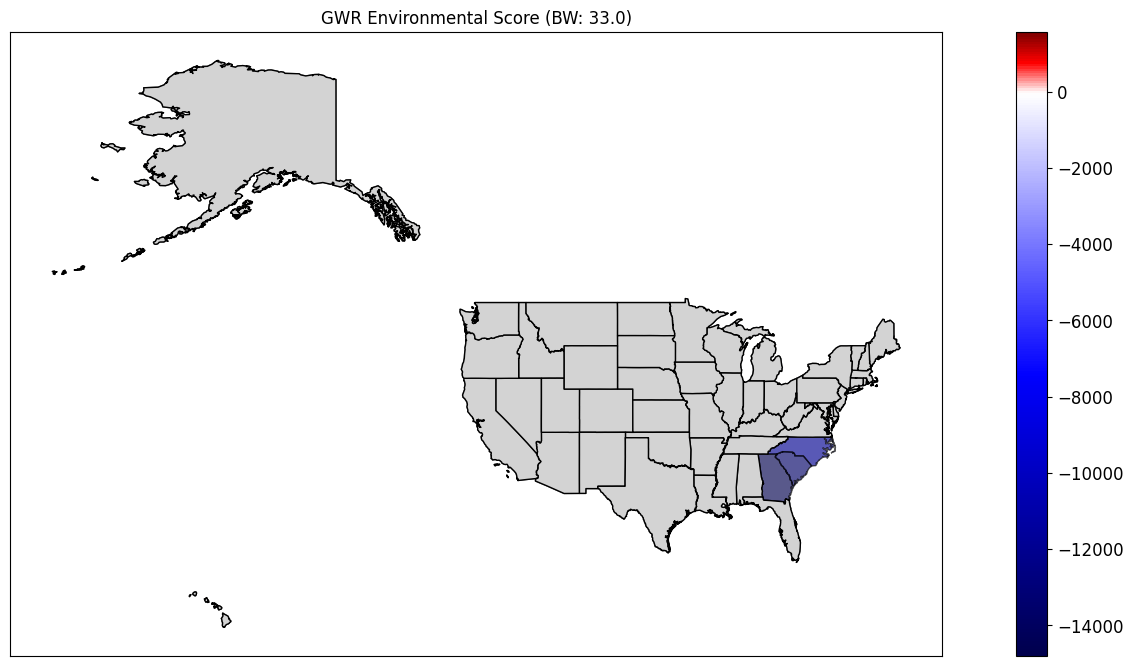

In [ ]:
#Prep plot and add axis
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,7))
ax.set_title('GWR Environmental Score (BW: ' + str(gwr_bw) +')', fontsize=12)

#Set color map
cmap = plt.cm.seismic

#Find min and max values of the combined dataset
gwr_min = gpd_ev_data['gwr_env_score'].min()
gwr_max = gpd_ev_data['gwr_env_score'].max()
vmin = np.min([gwr_min])
vmax = np.max([gwr_max])

#If all values are negative use the negative half of the colormap
if (vmin < 0) & (vmax < 0):
    cmap = truncate_colormap(cmap, 0.0, 0.5)
#If all values are positive use the positive half of the colormap
elif (vmin > 0) & (vmax > 0):
    cmap = truncate_colormap(cmap, 0.5, 1.0)
#Otherwise, there are positive and negative values so the colormap so zero is the midpoint
else:
    cmap = shift_colormap(cmap, start=0.0, midpoint=1 - vmax/(vmax + abs(vmin)), stop=1.0, name='env')

#Create scalar mappable for colorbar and stretch colormap across range of data values
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))

#Plot GWR parameters
gpd_ev_data.plot('gwr_env_score', cmap=sm.cmap, ax=ax, vmin=vmin, vmax=vmax, **{'edgecolor':'black', 'alpha':.65})
#If there are insignificnt parameters plot gray polygons over them
if (gwr_filtered_t[:,4] == 0).any():
    gpd_ev_data[gwr_filtered_t[:,4] == 0].plot(color='lightgrey', ax=ax, **{'edgecolor':'black'})

#Set figure options and plot
fig.tight_layout()
sm._A = []
cbar = fig.colorbar(sm)
cbar.ax.tick_params(labelsize=12)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.show()

<ipython-input-31-2bd249611910>:36: MatplotlibDeprecationWarning:

Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.



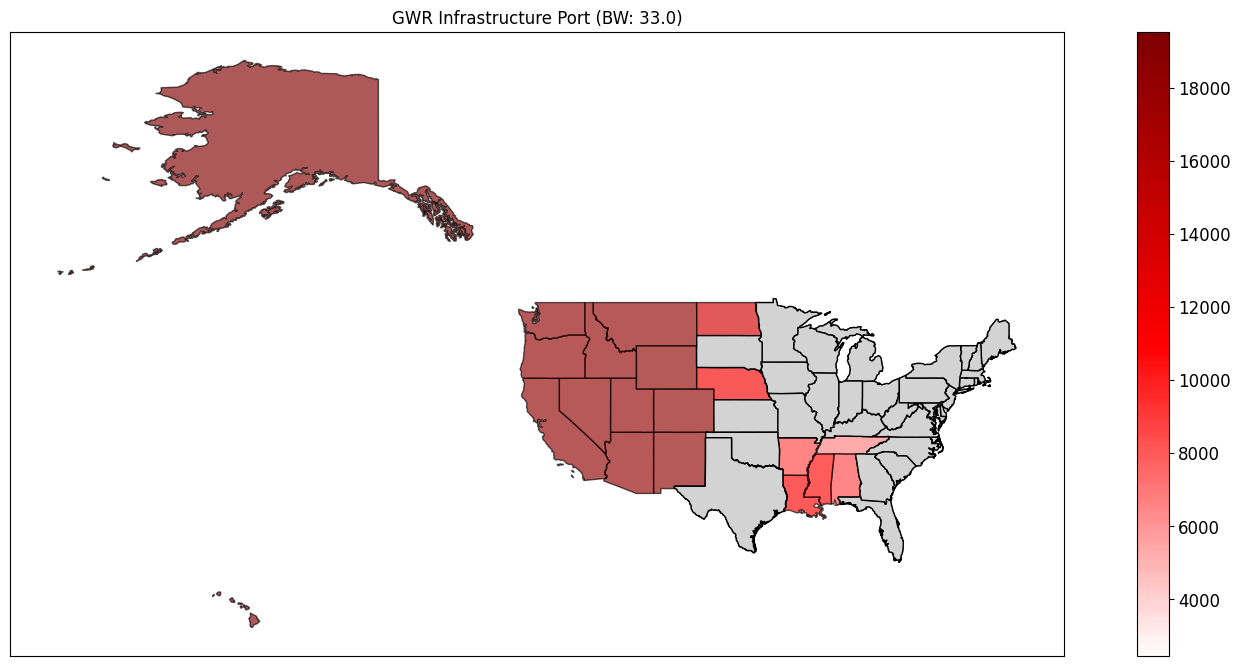

In [ ]:
#Prep plot and add axis
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,7))
ax.set_title('GWR Infrastructure Port (BW: ' + str(gwr_bw) +')', fontsize=12)

#Set color map
cmap = plt.cm.seismic

#Find min and max values of the combined dataset
gwr_min = gpd_ev_data['gwr_infra_port'].min()
gwr_max = gpd_ev_data['gwr_infra_port'].max()
vmin = np.min([gwr_min])
vmax = np.max([gwr_max])

#If all values are negative use the negative half of the colormap
if (vmin < 0) & (vmax < 0):
    cmap = truncate_colormap(cmap, 0.0, 0.5)
#If all values are positive use the positive half of the colormap
elif (vmin > 0) & (vmax > 0):
    cmap = truncate_colormap(cmap, 0.5, 1.0)
#Otherwise, there are positive and negative values so the colormap so zero is the midpoint
else:
    cmap = shift_colormap(cmap, start=0.0, midpoint=1 - vmax/(vmax + abs(vmin)), stop=1.0, name='infra')

#Create scalar mappable for colorbar and stretch colormap across range of data values
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))

#Plot GWR parameters
gpd_ev_data.plot('gwr_infra_port', cmap=sm.cmap, ax=ax, vmin=vmin, vmax=vmax, **{'edgecolor':'black', 'alpha':.65})
#If there are insignificnt parameters plot gray polygons over them
if (gwr_filtered_t[:,5] == 0).any():
    gpd_ev_data[gwr_filtered_t[:,5] == 0].plot(color='lightgrey', ax=ax, **{'edgecolor':'black'})

#Set figure options and plot
fig.tight_layout()
sm._A = []
cbar = fig.colorbar(sm)
cbar.ax.tick_params(labelsize=12)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.show()

## Predict the EV adoption rate

In [ ]:
g_coords_array = np.array(g_coords)
gwr_predict = GWR(g_coords, g_y, g_X, gwr_bw).predict(g_coords_array, g_X)

In [ ]:
gwr_predict.predictions.shape

(51, 1)

In [ ]:
df = pd.DataFrame(gwr_predict.predictions, columns = ['predict'])

In [ ]:
df['predict'] = df['predict'] / df['predict'].sum(axis=0) * 100

In [ ]:
gdf = gpd.GeoDataFrame(df, geometry=geodatatest["geometry"])

In [ ]:
gdf

,predict,geometry
0,0.456946,"POLYGON ((-85.07007 31.98070, -85.11515 31.907..."
1,-0.213679,"MULTIPOLYGON (((-161.33379 58.73325, -161.3824..."
2,1.913291,"POLYGON ((-114.52063 33.02771, -114.55909 33.0..."
3,-0.067278,"POLYGON ((-94.46169 34.19677, -94.45262 34.508..."
4,39.135667,"MULTIPOLYGON (((-121.66522 38.16929, -121.7823..."
5,3.100860,"POLYGON ((-102.04446 37.64147, -102.04201 37.3..."
6,0.898016,"POLYGON ((-73.53039 41.52275, -73.51715 41.665..."
7,0.011694,"POLYGON ((-75.70707 38.55759, -75.71071 38.649..."
8,0.418953,"POLYGON ((-77.00793 38.96667, -76.91090 38.890..."
9,5.947034,"MULTIPOLYGON (((-80.78566 28.78519, -80.76242 ..."


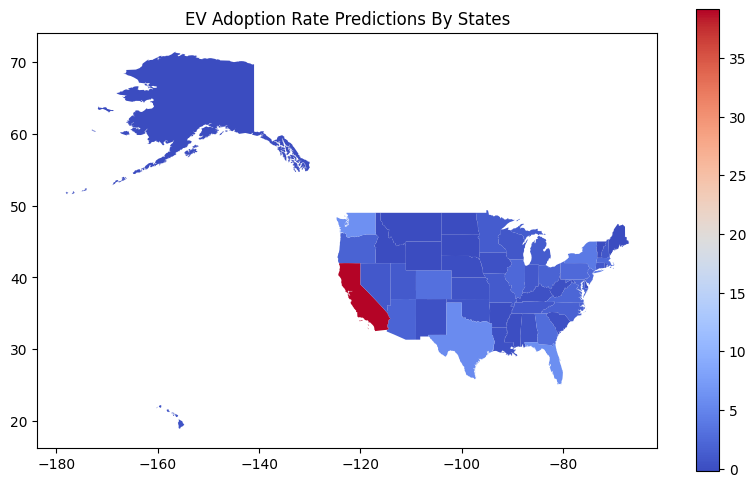

In [ ]:
gdf.plot(column='predict', cmap='coolwarm', legend=True, figsize=(10, 6))
plt.title('EV Adoption Rate Predictions By States')
plt.show()